--- Paso 1: carga y preprocesamiento ---
Dataset 'apple_actualizado.csv' cargado exitosamente.
Dimensiones del dataset: (4000, 8)
Columnas disponibles: ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity', 'Quality_numeric']
Características (X) extraídas. Primeras 5 filas:
[[-3.97004852 -2.51233638  5.34632961 -1.01200871  1.84490036  0.3298398
  -0.49159048]
 [-1.19521719 -2.83925653  3.66405876  1.58823231  0.8532858   0.86753008
  -0.72280937]
 [-0.29202386 -1.35128199 -1.73842916 -0.34261593  2.83863551 -0.03803333
   2.62163647]
 [-0.65719577 -2.27162661  1.32487385 -0.09787472  3.63797049 -3.41376134
   0.79072322]
 [ 1.36421682 -1.29661188 -0.38465821 -0.55300577  3.03087435 -1.30384943
   0.50198404]]
Etiquetas (y) extraídas. Primeras 5 filas:
[1. 1. 0. 1. 1.]

Datos divididos en entrenamiento (3200 muestras) y validación (800 muestras).
Dimensiones de X_train_t (características x muestras): (7, 3200)
Dimensiones de y_train_t (1 x muestras): (1, 320

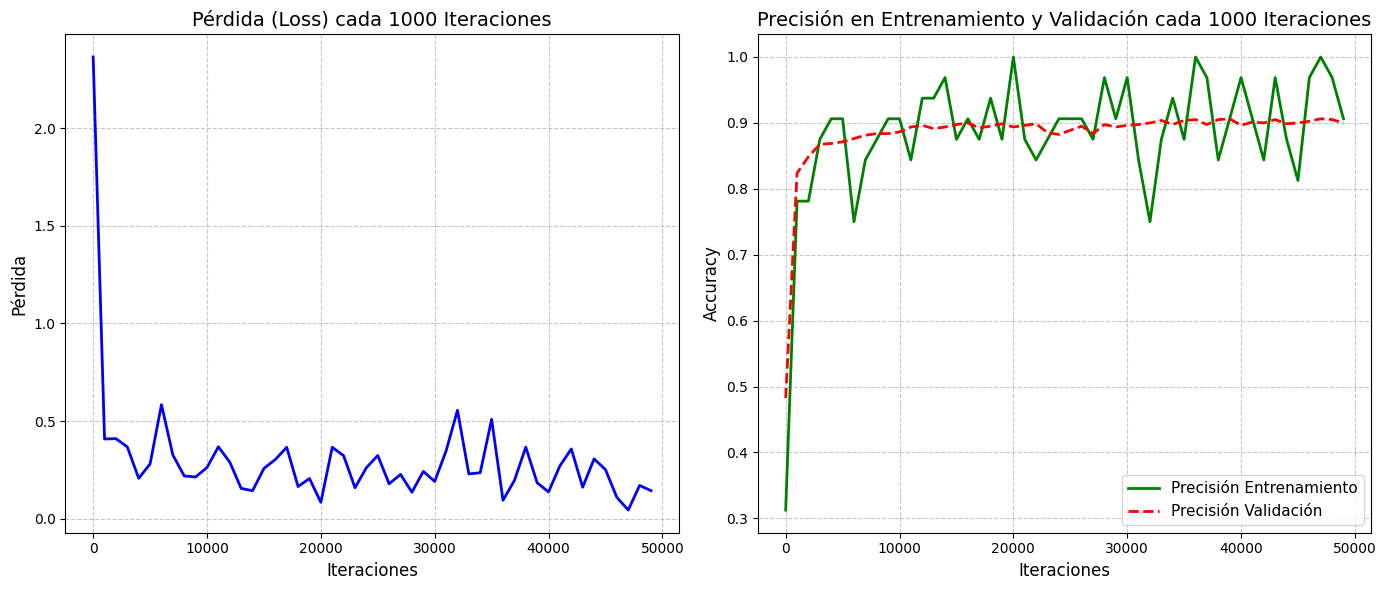

Gráficos de pérdida y precisión.

--- Paso 10: Demostración de Predicción con un Nuevo Ejemplo ---

Predicción para la nueva manzana: {'Size': 0.7, 'Weight': 0.6, 'Sweetness': 0.8, 'Crunchiness': 0.7, 'Juiciness': 0.8, 'Ripeness': 0.9, 'Acidity': 0.2}
Manzana de CALIDAD BUENA (Probabilidad: 0.9992)


In [ ]:
#RED NEURONAL PARA CLASIFICACIÓN DE CALIDAD DE MANZANAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # Para dividir los datos.
from sklearn.metrics import accuracy_score          # Para evaluar la precisión del modelo.
import time                                         # Para medir el tiempo de ejecución.
from sklearn.neural_network import MLPClassifier    # Para la comparación con Scikit-learn.

# --- 1. Carga y Preprocesamiento de Datos ---
print("--- Paso 1: carga y preprocesamiento ---")

# Ruta del archivo CSV con los datos de las manzanas.
FILE_PATH = "apple_actualizado.csv"
df_processed = pd.read_csv(FILE_PATH)
print(f"Dataset '{FILE_PATH}' cargado exitosamente.")
print(f"Dimensiones del dataset: {df_processed.shape}")
print(f"Columnas disponibles: {df_processed.columns.tolist()}")

# las características (X) y la variable objetivo (y).
features_cols = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
X = df_processed[features_cols].values
y = df_processed['Quality_numeric'].values.reshape(-1, 1)# La variable objetivo 'Quality_numeric' indica si la manzana es buena (1) o mala (0).

print(f"Características (X) extraídas. Primeras 5 filas:\n{X[:5]}")
print(f"Etiquetas (y) extraídas. Primeras 5 filas:\n{y[:5].flatten()}")

# División del dataset en conjuntos de entrenamiento y validación.
# utilizo un 80% de los datos para entrenar el modelo y el 20% restante para validarlo.
# `random_state=42` garantiza que la división sea reproducible en cada ejecución.
TEST_SIZE_RATIO = 0.2
RANDOM_SEED = 42 # Semilla para reproducibilidad

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=TEST_SIZE_RATIO, random_state=RANDOM_SEED)

print(f"\nDatos divididos en entrenamiento ({len(X_train)} muestras) y validación ({len(X_val)} muestras).")

# Transposición de los conjuntos de datos. Para las operaciones de la red neuronal!!
X_train_t = X_train.T
y_train_t = y_train.T
X_val_t = X_val.T
y_val_t = y_val.T

print(f"Dimensiones de X_train_t (características x muestras): {X_train_t.shape}")
print(f"Dimensiones de y_train_t (1 x muestras): {y_train_t.shape}")

# --- 2. Definición de la Arquitectura de la Red Neuronal ---

print("\n--- Paso 2: Arquitectura de la Red Neuronal ---")
input_dim = X_train_t.shape[0] # mis 7 características ('Size', 'Weight', etc.)
h1_dim = 16 #neuronas en la capa oculta
output_dim = 1#capa d salida

print(f"Capa de Entrada (input_dim): {input_dim} neuronas")
print(f"Capa Oculta (h1_dim): {h1_dim} neuronas")
print(f"Capa de Salida (output_dim): {output_dim} neurona")

# --- 3. Funciones de Activación y sus Derivadas ---
print("\n--- Paso 3: Funciones de activacion ---")

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)
def relu_deriv(x):
    return (x > 0).astype(float)

print("Funciones de activación (Sigmoid, ReLU) y sus derivadas definidas.")

# --- 4. Inicialización de Pesos y Sesgos ---
# Los pesos (W) y sesgos (b) son los parametros que la red neuronal aprende.
# Se inicializan aleatoriamente para asegurar que la red no se estanque en un mismo punto de partida durante el entrenamiento.

print("\n--- Paso 4: Inicializando Pesos y Sesgos ---")

def init_pesos(input_dim, h1_dim, output_dim):
    # Establece una semilla para la generación de números aleatorios para reproducibilidad.
    np.random.seed(RANDOM_SEED)

    # Pesos y sesgos para la conexión desde la capa de entrada a la capa oculta (H1).
    # multiplico por 2 y restar 1 los pone en el rango de -1 a 1.
    W1 = np.random.rand(h1_dim, input_dim) * 2 - 1
    b1 = np.random.rand(h1_dim, 1) * 2 - 1

    # Pesos y sesgos para la conexión desde la capa oculta (H1) a la capa de salida.
    W2 = np.random.rand(output_dim, h1_dim) * 2 - 1
    b2 = np.random.rand(output_dim, 1) * 2 - 1

    print("Pesos (W) y Sesgos (b) inicializados para las capas.")
    return W1, b1, W2, b2

# --- 5. Forward Propagation ---
# el proceso de pasar los datos de entrada a traves de la red, capa por capa, para calcular la prediccion.

print("\n--- Paso 5: Forward Propagation ---")

def forward_prop(X_input, W1, b1, W2, b2):
    # calculo (H1):
    # Z1 = W1 * X_input + b1 (mul de matrices + suma de sesgo)
    Z1 = W1 @ X_input + b1
    # A1 = ReLU(Z1) (aplico la funcion de activaicon)
    A1 = relu(Z1)

    # calculo d la Capa de Salida:
    # Z_output = W2 * A1 + b2
    Z_output = W2 @ A1 + b2
    # A_output = Sigmoid(Z_output) (la probabilidad final)
    A_output = sigmoid(Z_output)

    return Z1, A1, Z_output, A_output

print("Función 'forward_prop'.")

# --- 6. Retropropagación (Backward Propagation) ---
# Calcula como cada peso y sesgo contribuye al error de la predicción, y se ajustan los parametros para minimizar el error.
print("\n--- Paso 6: Backward Propagation ---")

def backward_prop(Xb, yb, Z1, A1, Z_output, A_output, W1, W2, batch_size):
    # 1. Error en la capa de salida (derivada de la pérdida respecto a Z_output)
    dZ_output = A_output - yb

    # 2. Gradientes para W2 y b2 
    dW2 = (dZ_output @ A1.T) / batch_size
    db2 = np.sum(dZ_output, axis=1, keepdims=True) / batch_size

    # 3. Retropropagación del error a la capa oculta (H1)

    # dA1 (derivada de la pérdida respecto a A1)
    dA1 = W2.T @ dZ_output
    # dZ1 (derivada de la pérdida respecto a Z1)
    dZ1 = dA1 * relu_deriv(Z1)

    # 4. Gradientes para W1 y b1 
    dW1 = (dZ1 @ Xb.T) / batch_size
    db1 = np.sum(dZ1, axis=1, keepdims=True) / batch_size

    return dW1, db1, dW2, db2
print("Función 'backward_prop' definida.")

# --- 7. Entrenamiento de la Red Neuronal ---
# Inicialización, propagación hacia adelante, cálculo de pérdida, retropropagación, y actualización de pesos y sesgos.

print("\n--- Paso 7: Definiendo el Bucle de Entrenamiento ---")

def entrenar_red(X_train_data, y_train_data, X_val_data, y_val_data,
                 input_dim, h1_dim, output_dim, iteraciones, batch_size, lr):

    # Inicialización de los pesos y sesgos al inicio del entrenamiento.
    W1, b1, W2, b2 = init_pesos(input_dim, h1_dim, output_dim)
    # Listas para almacenar el progreso del entrenamiento a lo largo de las iteraciones.
    loss_hist, acc_train_hist, acc_val_hist = [], [], []
    num_samples_train = X_train_data.shape[1]    # numero total de muestras en el conjunto de entrenamiento

    print("\nIniciando el proceso de entrenamiento...")
    print(f"Parámetros: Iteraciones={iteraciones}, Tamaño de Batch={batch_size}, Tasa de Aprendizaje={lr}")

    for it in range(iteraciones):
        idx = np.random.choice(num_samples_train, size=batch_size, replace=False)
        Xb = X_train_data[:, idx] # caracteristicas del mini-batch.
        yb = y_train_data[:, idx] # etiquetas del mini-batch.

        # 1. forward_prop con el mini-batch.
        Z1, A1, Z_output, A_output = forward_prop(Xb, W1, b1, W2, b2)

        # 2. Cálculo de la función de pérdida.
        loss = -np.mean(yb * np.log(A_output + 1e-8) + (1 - yb) * np.log(1 - A_output + 1e-8))

        # 3. Cálculo de la precisión en el mini-batch de entrenamiento.
        acc_train = accuracy_score(yb.flatten(), (A_output > 0.5).astype(int).flatten())

        # 4. hago el registro del progreso.
        # Cada 1000 iteraciones, se imprime el estado actual y se evalua la precisión en el set de validación.
        if it % 1000 == 0:
            # forward_prop en todo el conjunto de validación.
            _, _, _, val_preds = forward_prop(X_val_data, W1, b1, W2, b2)
            acc_val = accuracy_score(y_val_data.flatten(), (val_preds > 0.5).astype(int).flatten())

            # guardo los valores
            loss_hist.append(loss)
            acc_train_hist.append(acc_train)
            acc_val_hist.append(acc_val)

            print(f"  Iteración {it:5d} - Pérdida: {loss:.4f}, Precisión Train: {acc_train:.4f}, Precisión Val: {acc_val:.4f}")

        # 5. backward_prop para calcular los gradientes.
        dW1, db1, dW2, db2 = backward_prop(Xb, yb, Z1, A1, Z_output, A_output, W1, W2, batch_size)

        # 6. Actualización de los pesos y sesgos.
        W2 -= lr * dW2
        b2 -= lr * db2
        W1 -= lr * dW1
        b1 -= lr * db1

    print("\nProceso de entrenamiento finalizado.")
    return W1, b1, W2, b2, loss_hist, acc_train_hist, acc_val_hist

# --- 8. Ejecución del Entrenamiento de la Red Neuronal ---

print("\n--- Paso 8: Ejecutando el Entrenamiento ---")
#parametros
NUM_ITERATIONS = 50000 # numero de iteraciones.
BATCH_SIZE = 32        # tamaño de cada mini-batch.
LEARNING_RATE = 0.01   # tasa de aprendizaje.

start_time_nn = time.time()#le agregue para saber el tiempo

W1_final, b1_final, W2_final, b2_final, losses, accs_train, accs_val = \
    entrenar_red(X_train_t, y_train_t, X_val_t, y_val_t, input_dim, h1_dim, output_dim,
                 NUM_ITERATIONS, BATCH_SIZE, LEARNING_RATE)

end_time_nn = time.time()
training_time_nn = end_time_nn - start_time_nn

# forward_prop con los pesos finales.
train_preds_final = forward_prop(X_train_t, W1_final, b1_final, W2_final, b2_final)[-1]
val_preds_final = forward_prop(X_val_t, W1_final, b1_final, W2_final, b2_final)[-1]

#precisión comparando las predicciones binarizadas con las etiquetas reales.
train_acc_final = accuracy_score(y_train_t.flatten(), (train_preds_final > 0.5).astype(int).flatten())
val_acc_final = accuracy_score(y_val_t.flatten(), (val_preds_final > 0.5).astype(int).flatten())

print("\n--- RESULTADOS FINALES DE MI RED NEURONAL ---")
print(f"Precision final en el set de entrenamiento: {train_acc_final:.4f}")
print(f"Precision final en el set de validación: {val_acc_final:.4f}")
print(f"La red neuronal tardo: {training_time_nn:.2f} segundos en entrenar.")


# --- 9. graficos del Rendimiento del Entrenamiento ---
print("\n--- Paso 9: graficos ---")

plt.figure(figsize=(14, 6)) # tamaño
# grafico d la perdida
plt.subplot(1, 2, 1) #primer grafico
plt.plot(np.arange(0, NUM_ITERATIONS, 1000), losses, color='blue', linewidth=2)
plt.title("Pérdida (Loss) cada 1000 Iteraciones", fontsize=14)
plt.xlabel("Iteraciones", fontsize=12)
plt.ylabel("Pérdida", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(labelsize=10)

# grafico del accuracy
plt.subplot(1, 2, 2) #2do grafico
plt.plot(np.arange(0, NUM_ITERATIONS, 1000), accs_train, label='Precisión Entrenamiento', color='green', linewidth=2)
plt.plot(np.arange(0, NUM_ITERATIONS, 1000), accs_val, label='Precisión Validación', color='red', linestyle='--', linewidth=2)
plt.title("Precisión en Entrenamiento y Validación cada 1000 Iteraciones", fontsize=14)
plt.xlabel("Iteraciones", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(labelsize=10)

plt.tight_layout() 
plt.show()

print("Gráficos de pérdida y precisión.")

# --- 10. Ejemplo de Predicción con un Nuevo Dato ---

print("\n--- Paso 10: Demostración de Predicción con un Nuevo Ejemplo ---")

def predict_single_sample(input_data_dict, W1_final, b1_final, W2_final, b2_final):

    # convierto el diccionario de entrada a un DataFrame de Pandas
    df_single = pd.DataFrame([input_data_dict])

    # extrae los valores de las características.
    features_order = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
    X_single_input = df_single[features_order].values

    # Transpone los datos d forma características x 1 muestra.
    X_single_t = X_single_input.T

    # forward_prop para obtener la predicción.
    # El [-1] selecciona la activación de la capa de salida (A_output), que es la probabilidad.
    prediction_prob = forward_prop(X_single_t, W1_final, b1_final, W2_final, b2_final)[-1]
    return prediction_prob[0, 0] # da el valor escalar de la probabilidad.

def predecir_si_buena_manzana(input_data_dict, W1_final, b1_final, W2_final, b2_final):

    prob_buena = predict_single_sample(input_data_dict, W1_final, b1_final, W2_final, b2_final)

    if prob_buena > 0.5:
        return f"Manzana de CALIDAD BUENA (Probabilidad: {prob_buena:.4f})"
    else:
        return f"Manzana de CALIDAD MALA (Probabilidad: {prob_buena:.4f})"

datos_nueva_manzana = {
    'Size': 0.7, 'Weight': 0.6, 'Sweetness': 0.8, 'Crunchiness': 0.7,
    'Juiciness': 0.8, 'Ripeness': 0.9, 'Acidity': 0.2
}

# predicción para la nueva manzana.
resultado_prediccion = predecir_si_buena_manzana(datos_nueva_manzana, W1_final, b1_final, W2_final, b2_final)
print(f"\nPredicción para la nueva manzana: {datos_nueva_manzana}")
print(resultado_prediccion)



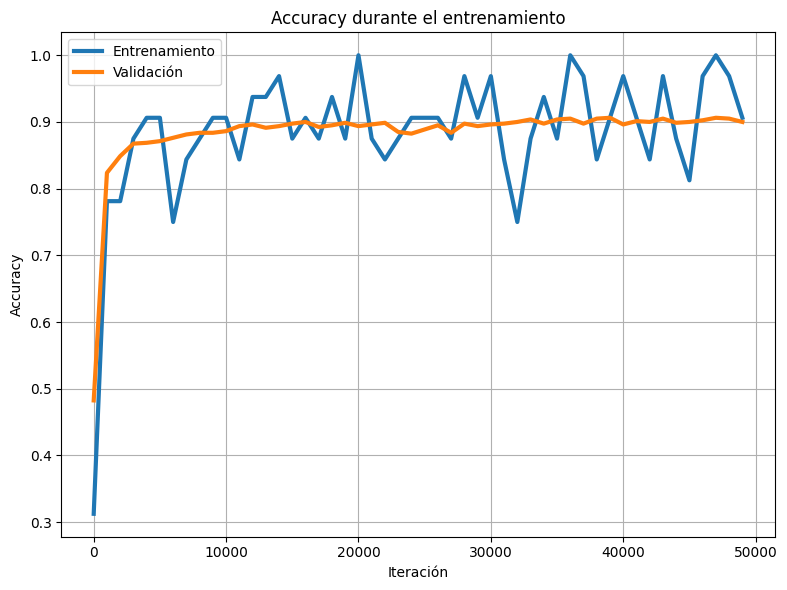

In [56]:
fmt_train = {'color': 'tab:blue', 'ls': 'solid', 'lw': 3}
fmt_val = {'color': 'tab:orange', 'ls': 'solid', 'lw': 3}

steps = np.arange(0, len(accs_train) * 1000, 1000)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax.plot(steps, accs_train, label='Entrenamiento', **fmt_train)
ax.plot(steps, accs_val, label='Validación', **fmt_val)

ax.grid(True)
ax.legend()
ax.set_title('Accuracy durante el entrenamiento')
ax.set_xlabel('Iteración')
ax.set_ylabel('Accuracy')
fig.tight_layout()
plt.show()

In [57]:
# --- 12. Predicciones con Muestras Aleatorias del Dataset ---
#  10 muestras aleatorias del dataset original

print("\n--- Paso 12: Predicciones con 10 Manzanas Aleatorias del Dataset Original ---")

# `random_state=1` asegura la misma selección de muestras cada vez.
sample_rows = df_processed.sample(n=10, random_state=1)

X_sample_raw = sample_rows[features_cols].values
y_real_samples = sample_rows['Quality_numeric'].values

for i, (original_features, true_label) in enumerate(zip(X_sample_raw, y_real_samples)):
    X_single_input = original_features.reshape(1, -1) # Formato (1, num_features)
    X_single_t = X_single_input.T                      # Formato (num_features, 1)

    #probabilidad predicha por la red 
    prob_prediction = forward_prop(X_single_t, W1_final, b1_final, W2_final, b2_final)[-1]

    #probabilidad a una clasificación binaria 
    binary_prediction = (prob_prediction > 0.5).astype(int)

    print(f"\n--- Manzana de Muestra {i+1} ---")
    print(f"   Características: {original_features}")
    print(f"   Probabilidad predicha (Calidad Buena): {prob_prediction[0,0]:.4f}")
    print(f"   Predicción de la red (0=Mala, 1=Buena): {binary_prediction[0,0]}")
    print(f"   Calidad REAL de la manzana: {int(true_label)}")

    if binary_prediction[0,0] == int(true_label):
        print("  Predicción correcta:)")
    else:
        print("  Predicción incorrecta :(")



--- Paso 12: Predicciones con 10 Manzanas Aleatorias del Dataset Original ---

--- Manzana de Muestra 1 ---
   Características: [-1.19355172 -1.48454888 -1.68280142 -0.25582627  1.88829673  1.36956133
  1.64019792]
   Probabilidad predicha (Calidad Buena): 0.0070
   Predicción de la red (0=Mala, 1=Buena): 0
   Calidad REAL de la manzana: 0
  Predicción correcta:)

--- Manzana de Muestra 2 ---
   Características: [-1.3784287  -1.09546502  1.55283841  2.1337372   1.70640912 -0.14060961
 -1.42972353]
   Probabilidad predicha (Calidad Buena): 0.8836
   Predicción de la red (0=Mala, 1=Buena): 1
   Calidad REAL de la manzana: 1
  Predicción correcta:)

--- Manzana de Muestra 3 ---
   Características: [-1.02350156 -1.74575056  1.36952746 -0.27713368 -0.37500112  0.72821983
 -1.68465921]
   Probabilidad predicha (Calidad Buena): 0.1902
   Predicción de la red (0=Mala, 1=Buena): 0
   Calidad REAL de la manzana: 0
  Predicción correcta:)

--- Manzana de Muestra 4 ---
   Características: [ 0.586

In [58]:

# --- 11. Comparacion con MLPClassifier de Scikit-learn ---

print("\n--- Paso 11: Comparación con MLPClassifier de Scikit-learn ---")

mlp_skl = MLPClassifier(hidden_layer_sizes=(h1_dim,), activation='relu', solver='sgd',
                        learning_rate_init=LEARNING_RATE, max_iter=NUM_ITERATIONS,
                        random_state=RANDOM_SEED, verbose=False)

print("Entrenando red neuronal con scikit-learn...")
start_time_skl = time.time()
# `y_train.ravel()` se usa para convertir el array 2D de y_train a 1D,
mlp_skl.fit(X_train, y_train.ravel())
end_time_skl = time.time()
training_time_skl = end_time_skl - start_time_skl

print(f"Tiempo total de entrenamiento con scikit-learn: {training_time_skl:.2f} segundos.")

y_train_pred_skl = mlp_skl.predict(X_train)
y_val_pred_skl = mlp_skl.predict(X_val)

train_acc_skl = accuracy_score(y_train, y_train_pred_skl)
val_acc_skl = accuracy_score(y_val, y_val_pred_skl)

print("\n--- RESULTADOS SCIKIT-LEARN ---")
print(f"Precisión en entrenamiento (scikit-learn): {train_acc_skl:.4f}")
print(f"Precisión en validación (scikit-learn): {val_acc_skl:.4f}")



--- Paso 11: Comparación con MLPClassifier de Scikit-learn ---
Entrenando red neuronal con scikit-learn...
Tiempo total de entrenamiento con scikit-learn: 1.67 segundos.

--- RESULTADOS SCIKIT-LEARN ---
Precisión en entrenamiento (scikit-learn): 0.9294
Precisión en validación (scikit-learn): 0.9187
